In [48]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [68]:
from prophet.plot import add_changepoints_to_plot

In [49]:
df = pd.read_csv('wp_log_R.csv')
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


<Axes: xlabel='ds'>

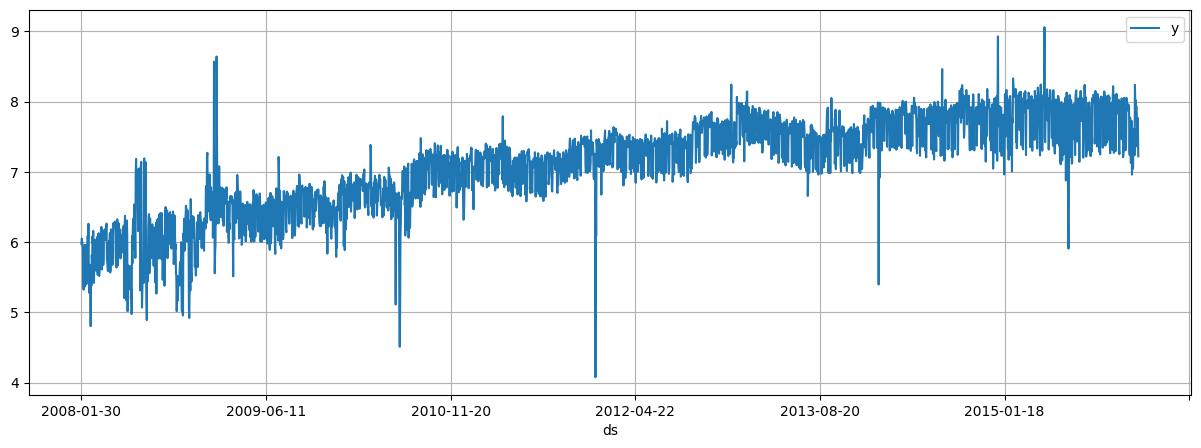

In [50]:
df.plot(x='ds', y='y', figsize=(15,5), grid=True)

In [51]:
m = Prophet()
m.fit(df)

13:16:49 - cmdstanpy - INFO - Chain [1] start processing
13:16:49 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = m.make_future_dataframe(periods=365) # имеющийся период + год
future.tail()

,ds
3223,2016-12-26
3224,2016-12-27
3225,2016-12-28
3226,2016-12-29
3227,2016-12-30


In [53]:
forecast = m.predict(future)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3223,2016-12-26,7.805592,7.210954,7.990708,7.563853,8.052215,-0.215966,-0.215966,-0.215966,0.099471,0.099471,0.099471,-0.315438,-0.315438,-0.315438,0.0,0.0,0.0,7.589625
3224,2016-12-27,7.805640,7.274074,8.041602,7.562637,8.053470,-0.148652,-0.148652,-0.148652,0.163570,0.163570,0.163570,-0.312222,-0.312222,-0.312222,0.0,0.0,0.0,7.656988
3225,2016-12-28,7.805688,7.267548,8.060091,7.562393,8.054785,-0.136055,-0.136055,-0.136055,0.169011,0.169011,0.169011,-0.305066,-0.305066,-0.305066,0.0,0.0,0.0,7.669633
3226,2016-12-29,7.805736,7.283638,8.068505,7.561424,8.056680,-0.144968,-0.144968,-0.144968,0.149033,0.149033,0.149033,-0.294001,-0.294001,-0.294001,0.0,0.0,0.0,7.660768
3227,2016-12-30,7.805784,7.186859,7.956614,7.560548,8.058574,-0.227488,-0.227488,-0.227488,0.051645,0.051645,0.051645,-0.279132,-0.279132,-0.279132,0.0,0.0,0.0,7.578297


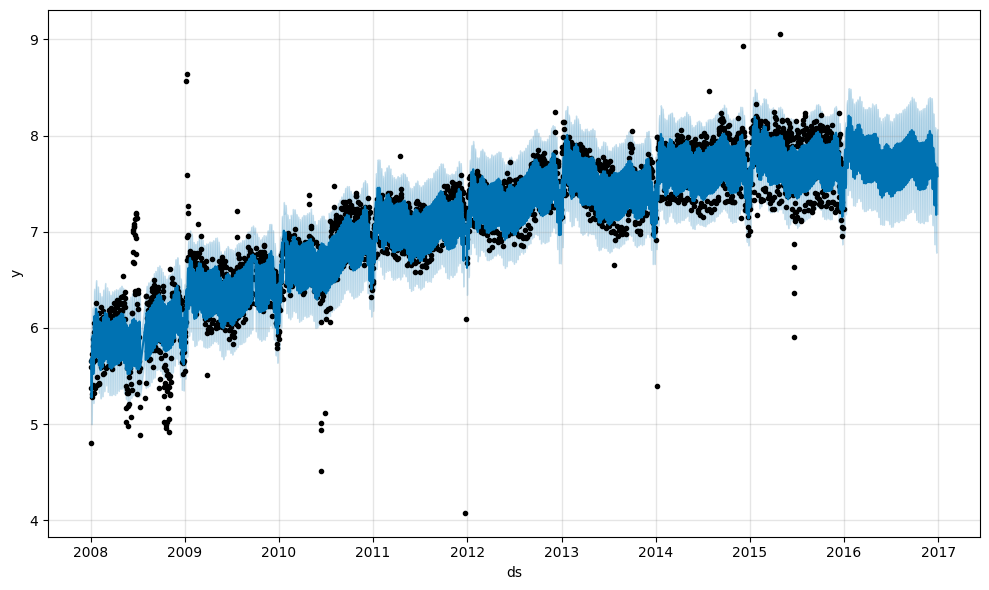

In [54]:
f = m.plot(forecast)

In [55]:
df['cap'] = 9

In [64]:
m = Prophet(growth='logistic')

m.add_country_holidays(country_name='US')

m.fit(df)

13:27:30 - cmdstanpy - INFO - Chain [1] start processing
13:27:30 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 9

In [66]:
forecast = m.predict(future)

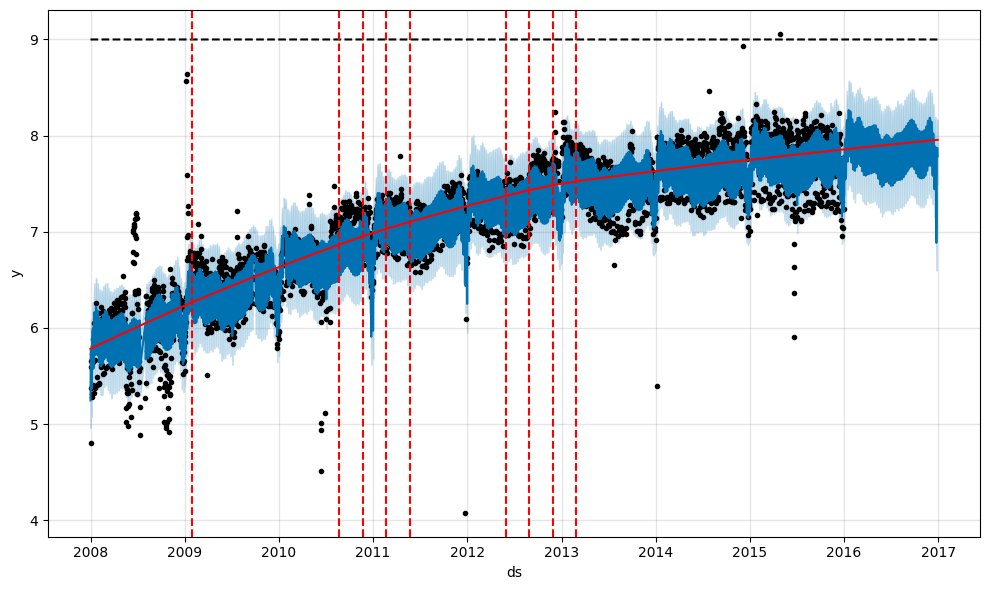

In [67]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)